In [110]:
import itertools
import pandas as pd
import zipfile
import os
from agg_constants import aggConstants
from agg_plots import (
    draw_ps,
    draw_cov_bal,
    draw_km_plot,
    draw_raw_km_plot,
    draw_forest_plot,
)
from lifelines import CoxPHFitter
from agg_utils import make_html, get_data_from_sources, get_cohort_name, get_stratpop
from loguru import logger
import pyreadr
from pathlib import Path



In [112]:
inpath = "/Users/choibyungjin/Downloads/CT_cont_sub/sub_cont"
report_path='./reports'

survival_aggregation(inpath)

,0,1,2,3,4,5,6
0,sub_cont,[cbj] CT_cont_ioversol,[cbj] CT_cont_NoIoversol,[cbj] AKI,"1.776 (0.899-3.505) ,p=0.0980",992 (35),992 (16)
0,sub_cont,[cbj] CT_cont_Iopromide,[cbj] CT_cont_NoIopromide,[cbj] AKI,"1.885 (1.219-2.916) ,p=0.0044",2336 (87),2336 (42)
0,sub_cont,[cbj] CT_cont_Iopamidol,[cbj] CT_cont_NoIopamidol,[cbj] AKI,"0.424 (0.298-0.604) ,p=0.0000",4433 (68),4433 (155)
0,sub_cont,[cbj] CT_cont_Iohexol,[cbj] CT_cont_NoIohexol,[cbj] AKI,"1.187 (0.987-1.428) ,p=0.0693",8318 (347),8318 (320)
0,sub_cont,[cbj] CT_cont_Iodixanol,[cbj] CT_cont_NoIodixanol,[cbj] AKI,"0.000 (0.000-0.000) ,p=0.0000",17 (0),17 (3)
0,sub_cont,[cbj] CT_cont_Iobitridol,[cbj] CT_cont_NoIobitridol,[cbj] AKI,"0.000 (0.000-0.000) ,p=0.0000",35 (0),35 (0)
0,sub_cont,[cbj] CT_cont_Iomeprol,[cbj] CT_cont_NoIomeprol,[cbj] AKI,"1.246 (0.701-2.214) ,p=0.4538",1143 (39),1143 (25)


In [65]:
km_pop.outcomeCount.value_counts()

0.0    9878
Name: outcomeCount, dtype: int64

In [82]:
df =pd.DataFrame()

In [95]:
df

,0,1,2,3,4,5,6
0,sub_demo,[cbj] CT_cont_under40,[cbj] CT_noncont_under40,[cbj] AKI,"0.891 (0.463-1.715) ,p=0.7301",2766,52.0
0,sub_demo,[cbj] CT_cont_4160,[cbj] CT_noncont_4160,[cbj] AKI,"0.579 (0.390-0.859) ,p=0.0067",6430,161.0
0,sub_demo,[cbj] CT_cont_over60,[cbj] CT_noncont_over60,[cbj] AKI,"0.900 (0.714-1.134) ,p=0.3708",12432,453.0
0,sub_demo,[cbj] CT_cont_male,[cbj] CT_noncont_male,[cbj] AKI,"0.736 (0.606-0.893) ,p=0.0020",11402,644.0
0,sub_demo,[cbj] CT_cont_female,[cbj] CT_noncont_female,[cbj] AKI,"0.000 (0.000-0.000) ,p=0.0000",9878,0.0


In [85]:
df=pd.concat([df,pd.DataFrame([source, t_name, c_name, o_name, hr_ci,n_len]).T])

In [86]:
df

,0,1,2,3,4,5
0,sub_demo,[cbj] CT_cont_under40,[cbj] CT_noncont_under40,[cbj] AKI,"0.891 (0.463-1.715) ,p=0.7301",2766
0,sub_demo,[cbj] CT_cont_under40,[cbj] CT_noncont_under40,[cbj] AKI,"0.891 (0.463-1.715) ,p=0.7301",2766


In [46]:
km_pop

,treatment,survivalTime,outcomeCount
0,1.0,3.0,0.0
1,0.0,2.0,0.0
2,1.0,3.0,0.0
3,0.0,3.0,0.0
4,1.0,2.0,0.0
...,...,...,...
2761,0.0,3.0,0.0
2762,1.0,3.0,0.0
2763,0.0,3.0,0.0
2764,1.0,3.0,0.0


In [42]:
from lifelines import CoxPHFitter


<lifelines.CoxPHFitter: fitted with 2766 total observations, 2730 right-censored observations>

In [45]:
cph.__dict__

{'alpha': 0.05,
 '_class_name': 'CoxPHFitter',
 '_label': None,
 '_censoring_type': <CensoringType.RIGHT: 'right'>,
 'penalizer': 0.0,
 'strata': None,
 'l1_ratio': 0.0,
 'baseline_estimation_method': 'breslow',
 'n_baseline_knots': None,
 'knots': None,
 'breakpoints': None,
 '_model': <lifelines.SemiParametricPHFitter: fitted with 2766 total observations, 2730 right-censored observations>}

In [18]:
a,t,c,o,pop_name = refer_values[0]
pop_path = [
	i for i in my_zip.namelist() if i.endswith(pop_name)
][0]
km_pop = pyreadr.read_r(inpath / pop_path)[None][
	["treatment", "survivalTime", "outcomeCount"]
]
km_pop_dict[source] = km_pop

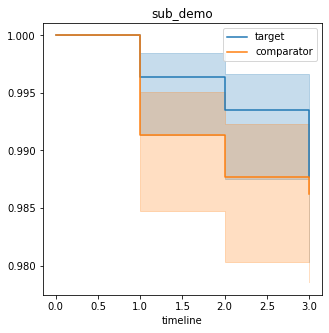

In [27]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(
	1,
	1,
	figsize=(5,5),
	facecolor="white",
)
df_treat, df_nontreat = (
	km_pop.query("treatment==1"),
	km_pop.query("treatment==0"),
)
kmf = KaplanMeierFitter()

kmf.fit(
	df_treat["survivalTime"],
	event_observed=df_treat["outcomeCount"],
	label="target",
)
axes = kmf.plot_survival_function(ax=axes, title=source)

kmf.fit(
	df_nontreat["survivalTime"],
	event_observed=df_nontreat["outcomeCount"],
	label="comparator",
)
axes = kmf.plot_survival_function(ax=axes)

In [ ]:

if km_method == "raw":
	km_pop_dict = {}
	for source in sources:
		my_zip = zipfile.ZipFile(inpath / f"{source}.zip")
		km_pop_path = [
			i
			for i in my_zip.namelist()
			if ("StratPop" in i)
			& (f"t{target_id}_c{comparator_id}" in i)
			& (f"o{outcome_id}" in i)
		][0]
		# ZipFile .extract (member, path=None, pwd=None)
		my_zip.extract(km_pop_path, temp_path)
		km_pop = pyreadr.read_r(temp_path / km_pop_path)[None][
			["treatment", "survivalTime", "outcomeCount"]
		]
		km_pop_dict[source] = km_pop


In [ ]:
df_treat, df_nontreat = (
	km_pop.query("treatment==1"),
	km_pop.query("treatment==0"),
)
kmf = KaplanMeierFitter()

kmf.fit(
	df_treat["survivalTime"],
	event_observed=df_treat["outcomeCount"],
	label="target",
)
axes = kmf.plot_survival_function(ax=axes, title=source)

kmf.fit(
	df_nontreat["survivalTime"],
	event_observed=df_nontreat["outcomeCount"],
	label="comparator",
)
axes = kmf.plot_survival_function(ax=axes)

In [3]:
import shutil

def get_stratpop_info(inpath, source):

    inpath = Path(inpath)
    shutil.rmtree(inpath / "script", ignore_errors=True)
    my_zip = zipfile.ZipFile(inpath / f"{source}.zip")
    my_zip.extractall(inpath)
    refer_path = [
        i for i in my_zip.namelist() if i.endswith("outcomeModelReference.rds")
    ][0]
    refer = pyreadr.read_r(str(inpath / refer_path))[None].query('strataFile != "" ')
    refer_values = refer[
        ["analysisId", "targetId", "comparatorId", "outcomeId", "strataFile"]
    ].values
    src, t, c, o, a = [], [], [], [], []
    t_counts, c_counts, t_o_counts, c_o_counts = [], [], [], []

    for a_id, t_id, c_id, o_id, pop_name in refer_values:
        src.append(source)
        t.append(t_id)
        c.append(c_id)
        o.append(o_id)
        a.append(a_id)
        filelist = []
        for root, dirs, files in os.walk(inpath):
            filelist.extend(os.path.join(root, file) for file in files)
        pop = pyreadr.read_r([i for i in filelist if i.endswith(pop_name)][0])[None]
        t_counts.append(len(pop.query("treatment == 1")))
        c_counts.append(len(pop.query("treatment == 0")))
        t_o_counts.append(len(pop.query("treatment == 1 & outcomeCount == 1")))
        c_o_counts.append(len(pop.query("treatment == 0 & outcomeCount == 1")))

    shutil.rmtree(inpath / "script", ignore_errors=True)
    return pd.DataFrame(
        {
            "source": src,
            "target_id": t,
            "comparator_id": c,
            "outcome_id": o,
            "analysis_id": a,
            "target_subjects": t_counts,
            "comparator_subjects": c_counts,
            "target_outcomes": t_o_counts,
            "comparator_outcomes": c_o_counts,
        }
    )

,rowId,personSeqId,treatment,cohortStartDate,daysFromObsStart,daysToCohortEnd,daysToObsEnd,riskStart,riskEnd,outcomeCount,timeAtRisk,daysToEvent,survivalTime,propensityScore,stratumId
0,21653.0,21653.0,0.0,2014-01-23,1511.0,1.0,2955.0,1,3.0,0.0,3.0,NaN,3.0,0.374597,4936.0
1,6729.0,6729.0,0.0,2007-05-29,208.0,1.0,299.0,1,3.0,0.0,3.0,NaN,3.0,0.376752,4932.0
2,6453.0,6453.0,1.0,2010-02-18,2439.0,1.0,37.0,1,3.0,0.0,3.0,NaN,3.0,0.382492,4932.0
3,3039.0,3039.0,1.0,2009-03-04,402.0,1.0,49.0,1,3.0,0.0,3.0,NaN,3.0,0.382956,4936.0
4,19103.0,19103.0,0.0,2009-01-19,4109.0,1.0,855.0,1,3.0,0.0,3.0,NaN,3.0,0.390409,4912.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9873,18022.0,18022.0,0.0,2021-09-04,6312.0,1.0,174.0,1,3.0,0.0,3.0,NaN,3.0,0.935167,4855.0
9874,12847.0,12847.0,1.0,2006-03-24,1098.0,1.0,80.0,1,3.0,0.0,3.0,NaN,3.0,0.939253,4879.0
9875,2558.0,2558.0,0.0,2014-08-25,2942.0,1.0,2528.0,1,3.0,0.0,3.0,NaN,3.0,0.939453,4879.0
9876,17870.0,17870.0,1.0,2008-01-09,3466.0,1.0,369.0,1,3.0,0.0,3.0,NaN,3.0,0.948495,4916.0


In [ ]:

# get study population
tcoa_id = (
	results[["target_id", "comparator_id", "outcome_id", "analysis_id"]]
	.drop_duplicates()
	.values
)
check_cols = [
	"target_subjects",
	"comparator_subjects",
	"target_outcomes",
	"comparator_outcomes",
	"target_no_outcomes",
	"comparator_no_outcomes",
]
# if target, comparator, outcome are not specified, use the first one
for target_id, comparator_id, outcome_id, analysis_id in tcoa_id:
	logger.info(
		f"target_id: {target_id}, comparator_id: {comparator_id}, outcome_id: {outcome_id}"
	)
	# if additional analysis(from other paper) is added, add it to results

	results_filter = results.query(
		"target_id == @target_id and comparator_id == @comparator_id and outcome_id == @outcome_id and analysis_id == @analysis_id"
	).copy()

	# get non significants rate of negative outcomes
	results_cated = results_cated.query(
		" target_id == @target_id & comparator_id == @comparator_id and analysis_id == @analysis_id "
	)

	# get attrition dataframe

	attrition_cated = pd.concat(attrition_dict.values())
	attrition_cated = attrition_cated.query(
		"target_id == @target_id & comparator_id == @comparator_id & outcome_id == @outcome_id and analysis_id == @analysis_id"
	)
	attritions = attrition_cated.pivot(
		index=["source", "cohort"], columns="description", values="subjects"
	)
	results_filter = results_filter.dropna(subset=["rr"])

	# if row in results have abnormal values...warn about source

	results_filter["target_no_outcomes"] = (
		results_filter["target_subjects"] - results_filter["target_outcomes"]
	)
	results_filter["comparator_no_outcomes"] = (
		results_filter["comparator_subjects"]
		- results_filter["comparator_outcomes"]
	)

	error_source = []
	for (_, row), col in itertools.product(results_filter.iterrows(), check_cols):
		if row[col] <= 0:
			logger.warning(f"{row['source']} has non-positive value in {col} ")
			error_source.append(row["source"])
	results_filter = results_filter[
		~results_filter["source"].isin(error_source)
	].sort_values("source")
	sources = results_filter.source.unique().tolist()

	if len(results_filter) == 0:
		continue

	# temporary sav start_pop for using R metafor packages
	strat_df = pd.concat(strat_dict.values())

	if add_analysis:
		for anal in add_analysis:
			add_t, add_c, add_o = int(anal[5]), int(anal[6]), int(anal[7])
			strat_df = strat_df.append(
				pd.DataFrame(
					{
						"source": anal[0],
						"target_id": add_t,
						"comparator_id": add_c,
						"outcome_id": add_o,
						"analysis_id": 1,
						"target_subjects": int(anal[1]),
						"comparator_subjects": int(anal[2]),
						"target_outcomes": int(anal[3]),
						"comparator_outcomes": int(anal[4]),
					},
					index=[0],
				)
			)
	strat_df = strat_df.query(
		"target_id == @target_id and comparator_id == @comparator_id and outcome_id == @outcome_id and analysis_id == @analysis_id"
	).copy()

	strat_df.loc[:, "target_no_outcomes"] = (
		strat_df.loc[:, "target_subjects"] - strat_df.loc[:, "target_outcomes"]
	)
	strat_df.loc[:, "comparator_no_outcomes"] = (
		strat_df.loc[:, "comparator_subjects"]
		- strat_df.loc[:, "comparator_outcomes"]
	)

	strat_df.sort_values("source").to_csv("./results/temp_results.csv")
	# use R metafor packages to get meta-analysis
	# metafor is selected of crenditality of results and aesthetics of plots
	os.system("Rscript metafor_script.R")
	# (aggConstants.metafor_script)
	os.makedirs("./results", exist_ok=True)
	# Illustrate PS distribution
	ps_fig = draw_ps(
		ps_dict, sources, target_id, comparator_id, outcome_id, analysis_id
	)
	ps_fig.savefig("./results/ps_density.png", dpi=dpi)

	# Illustrate covariate balance
	cov_bal_fig = draw_cov_bal(
		covariate_dict, sources, target_id, comparator_id, outcome_id, analysis_id
	)
	cov_bal_fig.savefig("./results/cov_bal.png", dpi=dpi)

	# Illustrate KM distribution
	km_fig = draw_km_plot(
		km_dict, sources, target_id, comparator_id, outcome_id, analysis_id
	)
	km_fig.savefig("./results/km_plot.png", dpi=dpi)

	if km_method == "raw":
		km_raw_fig = draw_raw_km_plot(km_pop_dict, sources)
		km_raw_fig.savefig("./results/km_raw_plot.png", dpi=dpi)

	# Extract forest plot and save to png
	forest_fig = draw_forest_plot()
	forest_fig.savefig("./results/forest_plot.png", dpi=dpi)

	# make_html

	text = f"""
			target: {cohort_name_dict[target_id]}, \n
			Comparator : {cohort_name_dict[comparator_id]}, \n
			Outcome : {cohort_name_dict[outcome_id]}, \n
			Analysis : {cohort_name_dict['analysis'][analysis_id]}, \n
			"""
	outpath = (
		f"report_t{target_id}_c{comparator_id}_o{outcome_id}_a{analysis_id}.html"
	)
	logger.info(f"{text} to {outpath}")

	outpath = report_path / str(inpath).split("/")[-1] / outpath
	os.makedirs(report_path / str(inpath).split("/")[-1], exist_ok=True)
	make_html(
		title=title,
		text=text,
		attritions=attritions,
		results=results_filter,
		outpath=outpath,
		km_method=km_method,
	) 